In [121]:
import joblib
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from datetime import timedelta

In [2]:
modelo = joblib.load("C:\\Users\\franc\\OneDrive\\Documentos\\VScode\\Github\\Franico-proyecto\\RF_clipping.joblib")

In [26]:
validate_dt = pd.read_excel("C:\\Users\\franc\\OneDrive\\Documentos\\VScode\\Github\\Franico-proyecto\\validation.xlsx")

#Correr los datos 5 horas
validate_dt.time = validate_dt.time - timedelta(hours=5) 
validate_dt['fecha'] = validate_dt['time'].dt.date

validate_dt['time'] = pd.DatetimeIndex(validate_dt['time'])

In [ ]:
#Para una planta transformación a 24 hrs

datos_planta = validate_dt.query("id_planta == 11")
datos_planta = datos_planta.iloc[10:]
datos_planta = datos_planta.iloc[:-38]
datos_planta.set_index('time', inplace=True)

datos_planta_horarios = datos_planta[['clipping', 'Potencia Fotovoltaica']].groupby(pd.Grouper(freq = '1H')).agg('mean')
datos_planta_horarios['fecha'] = datos_planta_horarios.index.date

In [65]:

def make_data(dataframe):
    '''Transforma los dataframe en listas con la potencia fotovoltaica por planta'''
    #por ahora no es útil

    dataframe['time'] = pd.DatetimeIndex(dataframe['time'])
    n_plantas = dataframe['id_planta'].unique()
    retorno = []

    for n in n_plantas:
        L = []
        datos_planta = dataframe.query(f"id_planta == {n}")
        datos_planta.set_index('time', inplace = True)
        datos_planta = datos_planta.groupby(pd.Grouper(freq='1H')).agg('mean')

        #Normalización
        data = list(datos_planta["Potencia Fotovoltaica"])
        maximo = max(data)
        minimo = min(data)
        normalized_list = list(map(lambda x: (x - minimo)/(maximo - minimo), data))

        retorno.append(normalized_list)

    return retorno

def day_separation_v2(dataframe_planta):
    '''Separa los datos de una planta en días y los normaliza'''

    lista_datos = []
    for day in dataframe_planta['fecha'].unique():
        datos_dia = dataframe_planta[dataframe_planta.fecha == day]

        data = list(datos_dia[["Potencia Fotovoltaica"]]['Potencia Fotovoltaica'])
        maximo = max(data)
        minimo = min(data)
        normalized_list = list(map(lambda x: (x - minimo)/(maximo - minimo), data))
        
        lista_datos.append(normalized_list)

    return lista_datos

In [61]:
#Transformación a 24 hrs

datos_planta = validate_dt.query("id_planta == 11")
datos_planta.set_index('time', inplace=True)

datos_planta_horarios = datos_planta[['clipping', 'Potencia Fotovoltaica']].groupby(pd.Grouper(freq = '1H')).agg('mean')
datos_planta_horarios['fecha'] = datos_planta_horarios.index.date

In [66]:
#Transformación de datos a vectores de testeo y clasificación

lista_datos = day_separation_v2(datos_planta_horarios)

predic = modelo.predict(lista_datos)

<Figure size 1200x600 with 0 Axes>

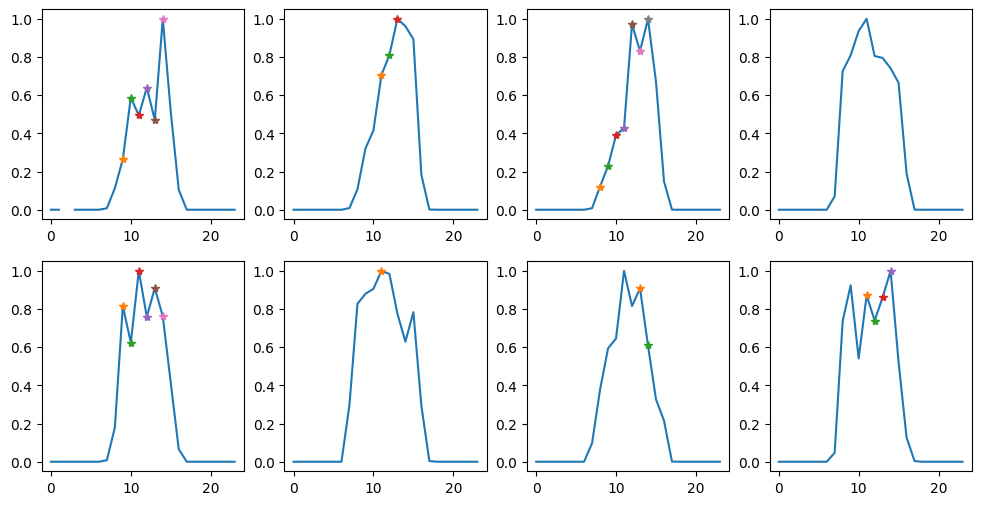

<Figure size 1200x600 with 0 Axes>

In [120]:
#Visualización de resultados
plt.figure(figsize=(12, 6))

J = [0,1,2,3,4,5,6,7]

for n in J: 
    plt.subplot(2, 4, n+1)
    plt.plot(lista_datos[n])
    for indice, elemento in enumerate(f[n]):
        if elemento == 1:
            plt.plot(indice, lista_datos[n][indice], '*')

plt.figure(figsize=(12, 6))